# Lab Questions

1. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between
salary and experience with exerience in x-axis and salary in y axis.

In [4]:
import pandas as pd
data = pd.read_csv('salary.csv')
data

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4
5,4.2,2.5
6,4.4,2.8
7,6.1,3.1
8,5.4,3.3
9,5.7,3.7


[[3.7280696]]


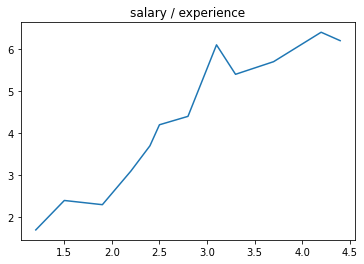

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x = data.iloc[:,1:]
y = data.iloc[:, 0:1]
npx = np.array(x)
npy = np.array(y)
plt.plot(x,y)
plt.title("salary / experience")

model = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.05)
model.fit(X_train,y_train)
print(model.predict(X_test))
model_coef = model.coef_
model_inter = model.intercept_

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph
between beta and mean squared error(MSE) for each case.

Text(0.5, 1.0, 'Beta / MSE')

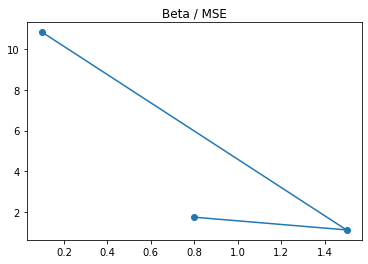

In [24]:
beta1 = 1.1 + 0.1*npx
beta2 = 1.1 + 1.5*npx
beta3 = 1.1 + 0.8*npx

err1 = (beta1 - npy)**2
err2 = (beta2 - npy)**2
err3 = (beta3 - npy)**2

MSE1 = err1.sum()/len(npx)
MSE2=  err2.sum()/len(npx)
MSE3=  err3.sum()/len(npx)
beta = [0.1,1.5,0.8]
mse = [MSE1,MSE2,MSE3]
plt.plot(beta, mse, marker ='o')
plt.title("Beta / MSE")

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between
beta and mean squared error(MSE).

Text(0.5, 1.0, 'Intercept Constant - Vary beta between 0- 1.5')

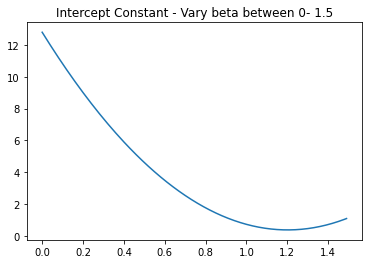

In [42]:
beta_vals = np.arange(0, 1.5, 0.01)
npys = []
mse_vals = []
for i in range(len(beta_vals)):
    temp = 1.1 + beta_vals[i]*npx
    #print(arr)
    npys.append(temp)
    err = (temp-npy)**2
    mse_vals.append(err.sum()/len(npx))
plt.plot(beta_vals,mse_vals)
plt.title("Intercept Constant - Vary beta between 0- 1.5")

c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between
beta and mean squared error(MSE).

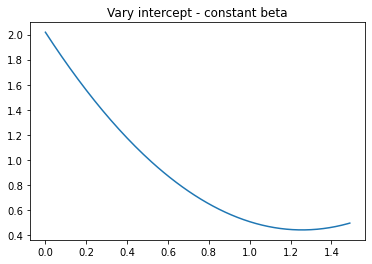

In [48]:
intercept_vals = np.arange(0,1.5,0.01)
y_vals = []
mse_vals = []
for i in range(len(intercept_vals)):
    temp = 1.1*npx + intercept_vals[i]
    y_vals.append(temp)
    mse = (temp-npy)**2
    mse_vals.append(mse.sum()/len(npx))
plt.plot(intercept_vals, mse_vals)
plt.title('Vary intercept - constant beta')
plt.show()

MSE =  0.23367335899862937


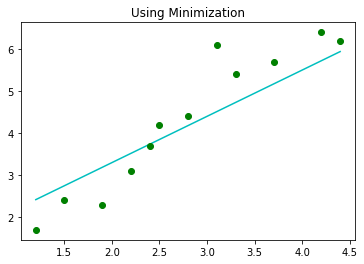

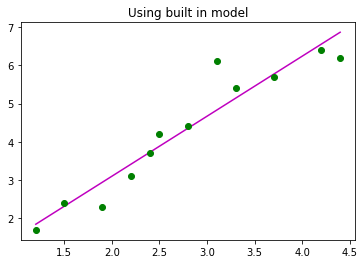

In [58]:
print("MSE = ",mean_squared_error(y,model.predict(x)))

equation1 = 1.1 + 1.1*npx
plt.plot(x,equation1,"c")
plt.plot(x,y,"go")
plt.title("Using Minimization")
plt.show()

equation2 = model_coef*npx + model_inter
plt.plot(x,equation2,"m")
plt.plot(x,y,"go")
plt.title("Using built in model")
plt.show()

2. Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error
for 60 iterations of 5 epochs.

a. Plot the graph of error versus iteration.

b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.

c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

for learning rate =  0.05
10.520833333333332
2.994560668054107
0.919628341197938
0.34751863486609713
0.18970694450748363
0.14610956134106295
0.1339996098627917
0.13057099401718908
0.12953653629224704
0.12916298314342117
0.1289725036794911
0.1288333611327607
for learning rate =  0.01
10.520833333333332
8.640559087833275
7.100527519440785
5.839169588219182
4.806057558686426
3.959888910798872
3.266835074904952
2.699188973480103
2.234257298679142
1.8534532392228265
1.5415533840525892
1.2860890939361327
for learning rate =  0.03
10.520833333333332
5.442540165499478
2.8461259655691578
1.5186206873147683
0.8398698997747399
0.4928076372761987
0.31532778241571147
0.22455044157238238
0.17810166253877635
0.15431694020415485
0.1421198754056956
0.13584744323048104
for learning rate =  0.07
10.520833333333332
1.2966205954971628
0.26082375010171627
0.1443713428196973
0.13113917834482833
0.12949809822836966
0.12916054496724227
0.12897146849796248
0.12880115783347623
0.1286350208118752
0.12847139046855

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


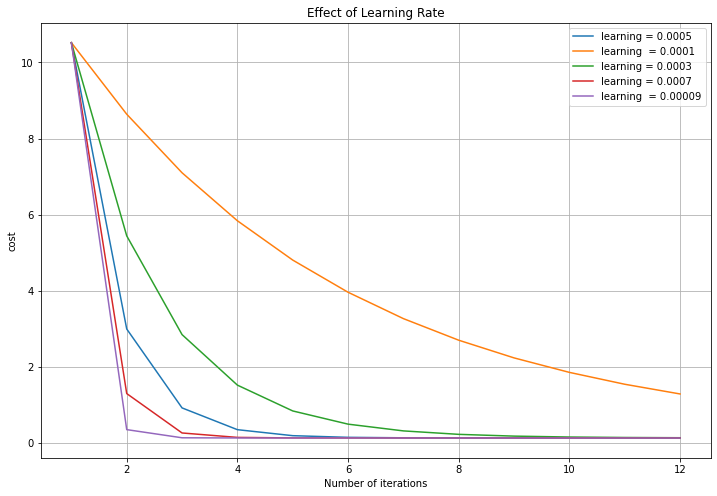

In [72]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
def custom_model(x,y, learning_rate, iteration):
    m = y.size
    theta = np.zeros((x.shape[1],1))
    cost_list = []
    print('for learning rate = ', learning_rate)
    for i in range(iteration):
        y_pred = np.dot(x, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - y))
        d_theta = (1/m)*np.dot(x.T, y_pred - y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        print(cost)
    return theta, cost_list

vals = data.values
y = vals[:, :-1]
x = vals[:, -1].reshape(vals.shape[0],1)
a = x.shape[0]
ones = np.ones((a,1))
x = np.concatenate((ones,x), axis =1)

iteration = 60//5;

learning = 0.05;
theta_1, ch1 = custom_model(x, y, learning, iteration)
learning = 0.01;
theta_2, ch2 = custom_model(x, y, learning, iteration)
learning = 0.03;
theta_3, ch3 = custom_model(x, y, learning, iteration)
learning = 0.07;
theta_4, ch4 = custom_model(x, y, learning, iteration)
learning = 0.09;
theta_5, ch5 = custom_model(x, y, learning, iteration)

plt.plot(range(1, iteration +1), ch1, label = 'learning = 0.0005')
plt.plot(range(1, iteration +1), ch2, label = 'learning  = 0.0001')
plt.plot(range(1, iteration +1), ch3, label = 'learning = 0.0003')
plt.plot(range(1, iteration +1), ch4, label = 'learning = 0.0007')
plt.plot(range(1, iteration +1), ch5, label = 'learning  = 0.00009')

plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.title("Effect of Learning Rate")
plt.legend()

sgd = SGDRegressor(penalty = "l2",learning_rate = "invscaling")
sgd.fit(x, y)
y_pred = sgd.predict(x)

mse = mean_squared_error(y, y_pred)
print(f"MSE= {mse}")

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
def custom_model(x,y, learning_rate, iteration):
    m = y.size
    theta = np.zeros((x.shape[1],1))
    cost_list = []
    print('for learning rate = ', learning_rate)
    for i in range(iteration):
        y_pred = np.dot(x, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - y))
        d_theta = (1/m)*np.dot(x.T, y_pred - y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
        print(cost)
    return theta, cost_list

vals = data.values
y = vals[:, :-1]
x = vals[:, -1].reshape(vals.shape[0],1)
a = x.shape[0]
ones = np.ones((a,1))
x = np.concatenate((ones,x), axis =1)

iteration = 60//5;

learning_rate = 0.05;
theta_1, cost_history_1 = custom_model(x, y, learning_rate, iteration)
learning_rate = 0.01;
theta_2, cost_history_2 = custom_model(x, y, learning_rate, iteration)
learning_rate = 0.03;
theta_3, cost_history_3 = custom_model(x, y, learning_rate, iteration)
learning_rate = 0.07;
theta_4, cost_history_4 = custom_model(x, y, learning_rate, iteration)
learning_rate = 0.09;
theta_5, cost_history_5 = custom_model(x, y, learning_rate, iteration)

plt.plot(range(1, iteration +1), cost_history_1, color ='cyan', label = 'learning_rate = 0.0005')
plt.plot(range(1, iteration +1), cost_history_2, color ='red', label = 'learning_rate = 0.0001')
plt.plot(range(1, iteration +1), cost_history_3, color ='green', label = 'learning_rate = 0.0003')
plt.plot(range(1, iteration +1), cost_history_4, color ='yellow', label = 'learning_rate = 0.0007')
plt.plot(range(1, iteration +1), cost_history_5, color ='blue', label = 'learning_rate = 0.00009')

plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate")
plt.legend()

sgd = SGDRegressor(penalty = "l2",learning_rate = "invscaling")
sgd.fit(x, y)
y_pred = sgd.predict(x)

mse = mean_squared_error(y, y_pred)
print(f"MSE= {mse}")